In [24]:
from scipy.io import arff
import pandas as pd


data = arff.loadarff('InsectSound.arff')
df = pd.DataFrame(data[0])
df.head()

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,...,att592,att593,att594,att595,att596,att597,att598,att599,att600,target
0,-0.000093,-0.000057,0.000168,-0.000156,1.566949e-04,-0.000204,0.000165,-0.000234,0.000199,-0.000246,...,-0.000478,-0.000575,-0.000605,-0.000495,-0.000598,-0.000579,-0.000487,-0.000542,-0.000566,b'Aedes_female'
1,0.002239,0.003596,0.003265,0.003201,3.102398e-03,0.002642,0.002411,0.001851,0.001294,0.000721,...,0.011505,-0.002971,-0.014134,-0.016019,-0.005880,0.010970,0.015013,0.004091,-0.011039,b'Aedes_female'
2,0.000082,-0.000061,0.000063,-0.000019,7.296765e-07,0.000026,-0.000035,0.000057,-0.000059,0.000040,...,0.027910,0.027776,0.028497,0.027991,0.029014,0.028141,0.029583,0.027899,0.031175,b'Aedes_female'
3,-0.000026,0.000126,0.000073,-0.000003,-7.181434e-05,-0.000003,0.000084,0.000147,0.000076,-0.000017,...,0.025778,0.020679,0.032503,0.032686,0.023457,0.020543,0.012545,-0.001848,-0.013853,b'Aedes_female'
4,0.001314,0.002005,0.002131,0.001849,1.903071e-03,0.002477,0.002317,0.002148,0.002329,0.002791,...,-0.003391,-0.004463,-0.005519,-0.006345,-0.007260,-0.007681,-0.008525,-0.008329,-0.009544,b'Aedes_female'


In [19]:
print(df)

           att1      att2      att3      att4          att5      att6  \
0     -0.000093 -0.000057  0.000168 -0.000156  1.566949e-04 -0.000204   
1      0.002239  0.003596  0.003265  0.003201  3.102398e-03  0.002642   
2      0.000082 -0.000061  0.000063 -0.000019  7.296765e-07  0.000026   
3     -0.000026  0.000126  0.000073 -0.000003 -7.181434e-05 -0.000003   
4      0.001314  0.002005  0.002131  0.001849  1.903071e-03  0.002477   
...         ...       ...       ...       ...           ...       ...   
49995 -0.000053 -0.000044  0.000008  0.000050  6.447443e-05  0.000016   
49996 -0.000043 -0.000072 -0.000019  0.000047  4.511108e-05  0.000051   
49997 -0.000011  0.000112  0.000074  0.000063  3.732557e-05  0.000041   
49998  0.000049 -0.000019 -0.000016  0.000037  5.787737e-06  0.000002   
49999  0.000000  0.000000  0.000000  0.000000  0.000000e+00  0.000000   

           att7      att8      att9     att10  ...    att592    att593  \
0      0.000165 -0.000234  0.000199 -0.000246  ..

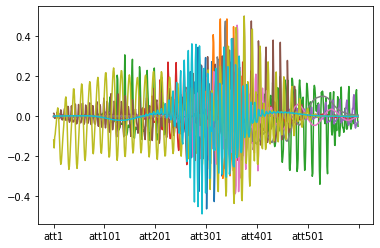

In [25]:
df2 = df.drop(['target'], axis=1)
for i in range (0, 5000, 500):
    row = df2.iloc[i]
    row.plot()

<AxesSubplot:>

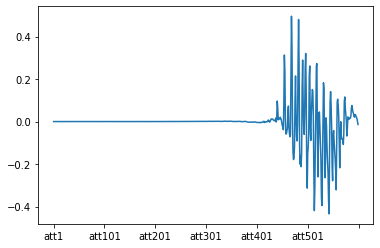

In [21]:
row = df2.iloc[3]
row.plot()

In [26]:
from tftb.generators import amgauss, fmlin
from tftb.processing import WignerVilleDistribution
import matplotlib.pyplot as plt
import numpy as np

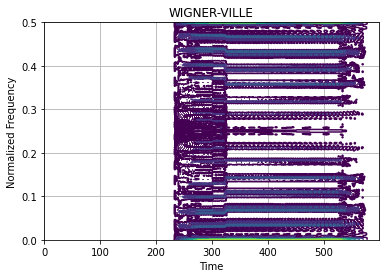

In [10]:

wvd = WignerVilleDistribution(row)
wvd.run()
wvd.plot(kind='contour')

<AxesSubplot:>

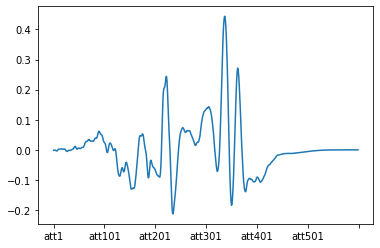

In [13]:
row2 = df2.iloc[17003]
row2.plot()

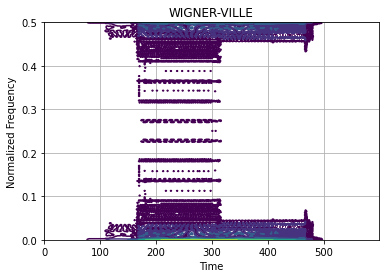

In [14]:
wvd = WignerVilleDistribution(row2)
wvd.run()
wvd.plot(kind='contour')

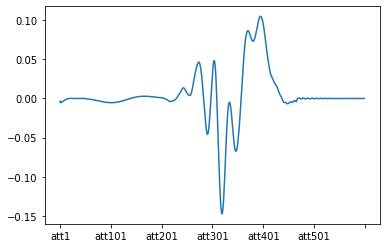

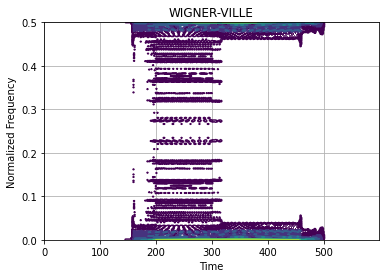

In [15]:
row2 = df2.iloc[17004]
row2.plot()
wvd = WignerVilleDistribution(row2)
wvd.run()
wvd.plot(kind='contour')

In [16]:
print(wvd)

In [27]:
dfx = pd.DataFrame(columns=['wvd', 'target'])

#
#
#in I use the first option of the for loop (for i in range(len(df)):),
#it takes a long time
#
#

#for i in range(len(df)):
for i in range (0, 50000, 5000):
    t = df.at[i, "target"]
    row2 = df2.iloc[i]
    #row2.plot()
    wvd = WignerVilleDistribution(row2)
    wvd.run()
    #wvd.plot(kind='contour')
    dfx.at[i, "target"] = t
    dfx.at[i, "wvd"] = wvd
    
    

In [28]:
dfx.to_csv('wvd-01.csv', encoding='utf-8-sig', sep=';')

In [ ]:

kmeans = KMeans(100)

label = kmeans.fit_predict(dfx)

np.savetxt("clKM100.csv", label, delimiter=",", fmt="%d")

In [ ]:
from sklearn.cluster import DBSCAN
#ohne Plotting

def clustDBScanOhnePlot(vektoren, epsilon, minSamples):

    vekt = numpy.array(vektoren)
    db = DBSCAN(eps=epsilon, min_samples=minSamples).fit(vekt)
    labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    return(labels, n_clusters, n_noise)
   